In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('Data_Train.xlsx')

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [6]:
df.shape

(10683, 11)

# Create new columns

In [7]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y")

In [8]:
flight_booking_date = pd.to_datetime("2019-03-01")
df['Booking_date'] = flight_booking_date

In [9]:
df['Days_Before_Journey'] = (df['Date_of_Journey'] - df['Booking_date']).dt.days

In [10]:
df['Days_Before_Journey']

0         23
1         61
2        100
3         72
4          0
        ... 
10678     39
10679     57
10680     57
10681      0
10682     69
Name: Days_Before_Journey, Length: 10683, dtype: int64

# Correlation

In [11]:
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix['Price'].sort_values(ascending=False))

Price                  1.000000
Days_Before_Journey   -0.138452
Name: Price, dtype: float64


# Create new column

In [12]:
df['Trip'] = df['Source']+'-'+df['Destination']

In [13]:
df['Trip'].value_counts()

Trip
Delhi-Cochin          4537
Kolkata-Banglore      2871
Banglore-Delhi        1265
Banglore-New Delhi     932
Mumbai-Hyderabad       697
Chennai-Kolkata        381
Name: count, dtype: int64

# Feature one hot encoding

In [14]:
columns = ['Airline','Trip']
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(df[columns])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [15]:
columns_enc = encoder.get_feature_names_out()
df[columns_enc] = encoder.transform(df[columns])

In [16]:
len(columns_enc)

18

In [17]:
df.drop(['Route', 'Additional_Info'], axis=1, inplace=True)
df.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)
df.drop(['Dep_Time','Arrival_Time','Duration'],axis=1,inplace=True)

In [18]:
df['Total_Stops'] = df['Total_Stops'].replace({
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
})

In [19]:
df['Journey_Day'] = pd.to_datetime(df['Date_of_Journey']).dt.day
df['Journey_Month'] = pd.to_datetime(df['Date_of_Journey']).dt.month
df['Journey_Weekday'] = pd.to_datetime(df['Date_of_Journey']).dt.weekday 

In [20]:
df

,Date_of_Journey,Total_Stops,Price,Booking_date,Days_Before_Journey,Trip,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Airline_Vistara Premium economy,Trip_Banglore-Delhi,Trip_Banglore-New Delhi,Trip_Chennai-Kolkata,Trip_Delhi-Cochin,Trip_Kolkata-Banglore,Trip_Mumbai-Hyderabad,Journey_Day,Journey_Month,Journey_Weekday
0,2019-03-24,0.0,3897,2019-03-01,23,Banglore-New Delhi,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,24,3,6
1,2019-05-01,2.0,7662,2019-03-01,61,Kolkata-Banglore,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5,2
2,2019-06-09,2.0,13882,2019-03-01,100,Delhi-Cochin,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,6,6
3,2019-05-12,1.0,6218,2019-03-01,72,Kolkata-Banglore,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12,5,6
4,2019-03-01,1.0,13302,2019-03-01,0,Banglore-New Delhi,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2019-04-09,0.0,4107,2019-03-01,39,Kolkata-Banglore,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9,4,1
10679,2019-04-27,0.0,4145,2019-03-01,57,Kolkata-Banglore,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,4,5
10680,2019-04-27,0.0,7229,2019-03-01,57,Banglore-Delhi,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,27,4,5
10681,2019-03-01,0.0,12648,2019-03-01,0,Banglore-New Delhi,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,3,4


In [21]:
df.drop(['Date_of_Journey','Booking_date','Trip'],axis=1,inplace=True)

In [22]:
X = df.drop('Price', axis=1)
y = df['Price']

In [23]:
X_col = list(X.columns)
X_col

['Total_Stops',
 'Days_Before_Journey',
 'Airline_Air Asia',
 'Airline_Air India',
 'Airline_GoAir',
 'Airline_IndiGo',
 'Airline_Jet Airways',
 'Airline_Jet Airways Business',
 'Airline_Multiple carriers',
 'Airline_Multiple carriers Premium economy',
 'Airline_SpiceJet',
 'Airline_Trujet',
 'Airline_Vistara',
 'Airline_Vistara Premium economy',
 'Trip_Banglore-Delhi',
 'Trip_Banglore-New Delhi',
 'Trip_Chennai-Kolkata',
 'Trip_Delhi-Cochin',
 'Trip_Kolkata-Banglore',
 'Trip_Mumbai-Hyderabad',
 'Journey_Day',
 'Journey_Month',
 'Journey_Weekday']

In [28]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

model = XGBRegressor()

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid = GridSearchCV(model, param_grid, cv=3, scoring='r2')
grid.fit(X, y)

print("Best Score:", grid.best_score_)
print("Best Params:", grid.best_params_)

Best Score: 0.7937854925791422
Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}


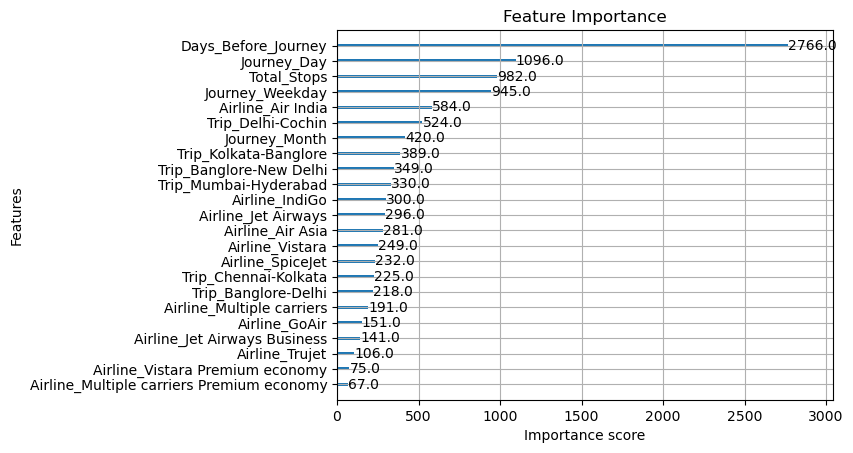

In [29]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(grid.best_estimator_)
plt.title("Feature Importance")
plt.show()

In [32]:
import pickle

In [33]:
pickle.dump(grid.best_estimator_,open('flight_model.pkl','wb'))

In [34]:
# During model training (save this list)
feature_order = X.columns.tolist()

# Save it with your model (optional)
import json
with open('feature_order.json', 'w') as f:
    json.dump(feature_order, f)
